In [1]:
import numpy as np
from scipy.misc import imread
from imgaug import augmenters
import matplotlib.pyplot as plt

In [44]:
# Setup some augmenters
aug_dict = {}
aug_dict['Vertical_Flip'] = augmenters.Fliplr(1.0) # Vertical Flip
aug_dict['Horizontal_Flip'] = augmenters.Flipud(1.0) # Horizontal Flip
aug_dict['Blur'] = augmenters.GaussianBlur(5.0) # Blur image
aug_dict['Dropout'] = augmenters.Dropout(0.3, per_channel=True) # Zeros a pixel w/ p=0.3
aug_dict['Add-'] = augmenters.Add(-75, per_channel=True) # Makes it darker
aug_dict['Add+'] = augmenters.Add(75, per_channel=True) # Makes it lighter
aug_dict['Invert'] = augmenters.Invert(0.75, per_channel=True, deterministic=True)
aug_dict['AddGaussianNoise'] = augmenters.AdditiveGaussianNoise(scale=50, per_channel=True) # Adds noise
aug_dict['Emboss'] = augmenters.Emboss(alpha=1.0, strength=1.75)
# Def some affine augmentations too
aug_dict['Rotate+45'] = augmenters.Affine(rotate=45) # Rotates 45 degrees
aug_dict['Rotate-45'] = augmenters.Affine(rotate=-45) # Rotates -45 degrees
aug_dict['Rotate+90'] = augmenters.Affine(rotate=90) # Rotates 90 degrees
aug_dict['Rotate-90'] = augmenters.Affine(rotate=-90) # Rotates -90 degrees
aug_dict['Scale_in'] = augmenters.Affine(scale={"x": 1.5, "y": 1.5}) # Zooms in
aug_dict['Scale_out'] = augmenters.Affine(scale={"x": 0.5, "y": 0.5}) # Zooms out
aug_dict['Translate'] = augmenters.Affine(translate_px={"x": 150, "y": 150})

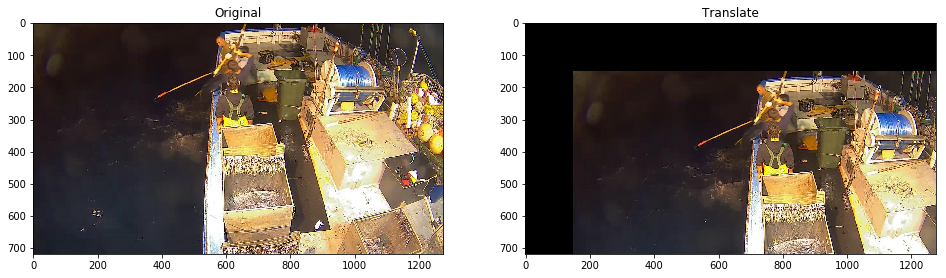

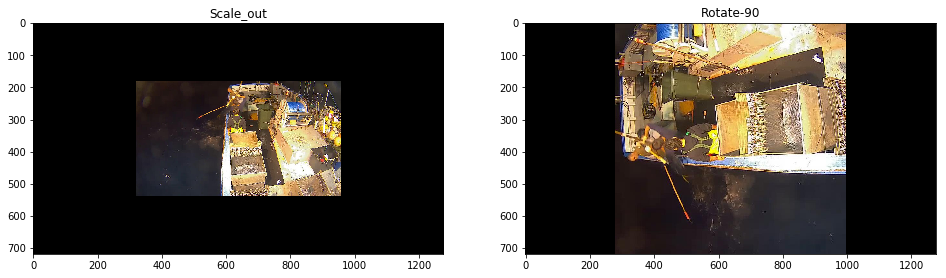

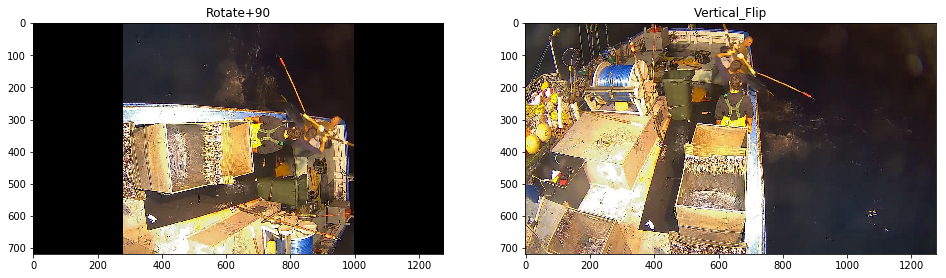

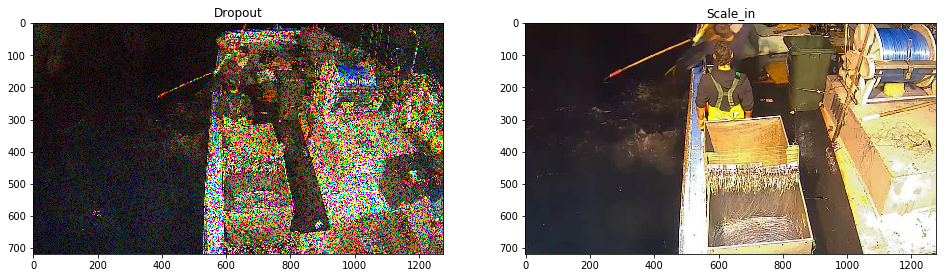

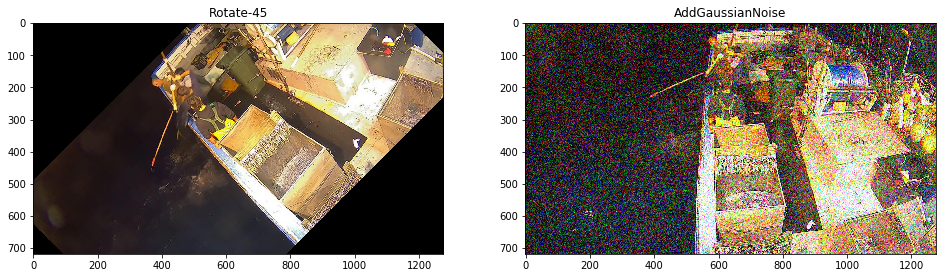

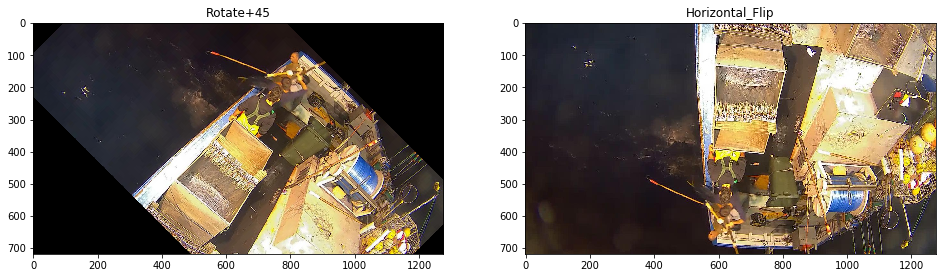

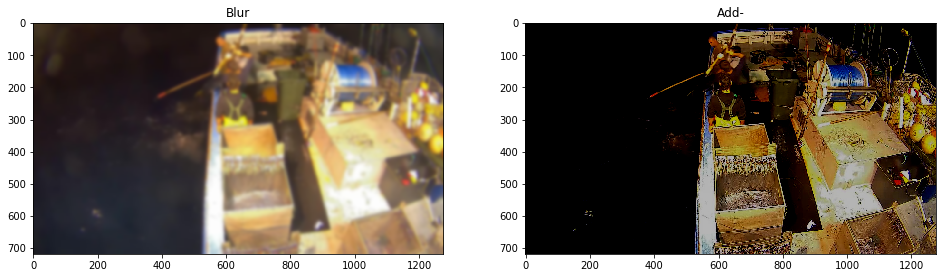

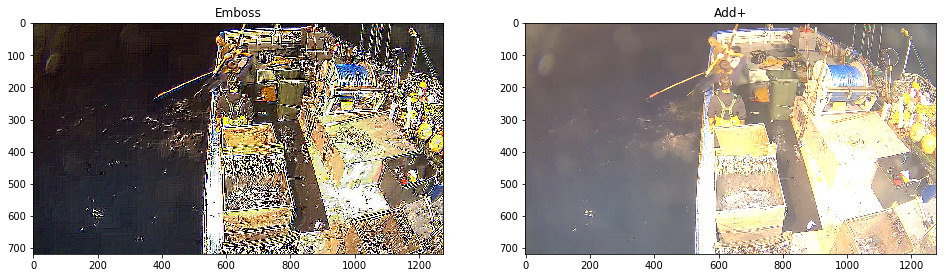

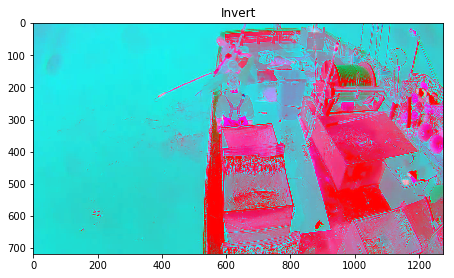

In [47]:
# Apply these augmenters to single images and plot them
#img = np.array(imread('/a/data/fisheries_monitoring/cropped_data/YFT/img_01539-0.jpg'))
img = np.array(imread('/a/data/fisheries_monitoring/data/train/YFT/img_02121.jpg'))
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1,3,1)
plt.imshow(img)
ax.set_title('Original')
sp_col = 2
for k, v in aug_dict.iteritems() :
    if sp_col > 2 :
        sp_col = 1
        plt.show()
        fig = plt.figure(figsize=(25, 25))
    aug_img = aug_dict[k].augment_image(img)
    ax = fig.add_subplot(1,3,sp_col)
    plt.imshow(aug_img)
    ax.set_title(k)
    sp_col += 1
plt.show()

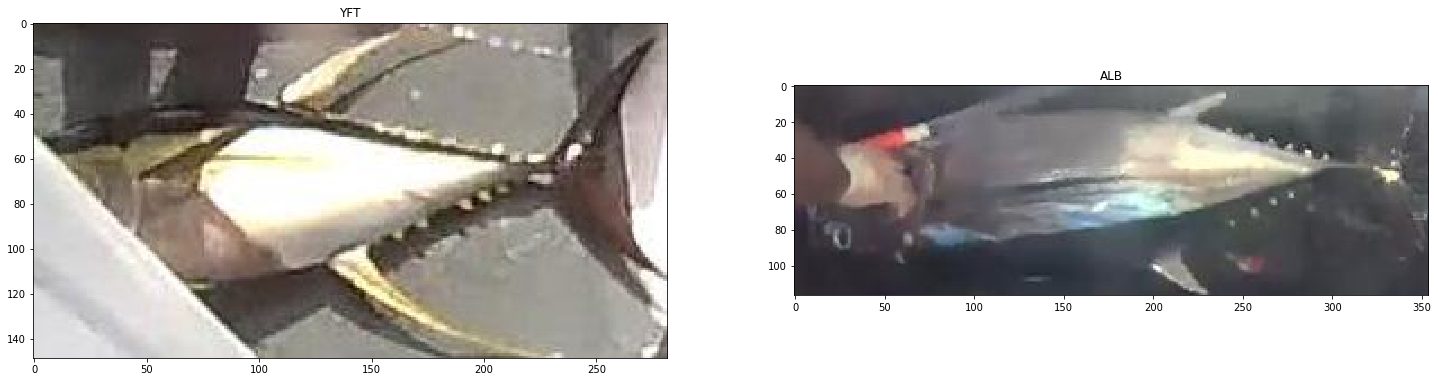

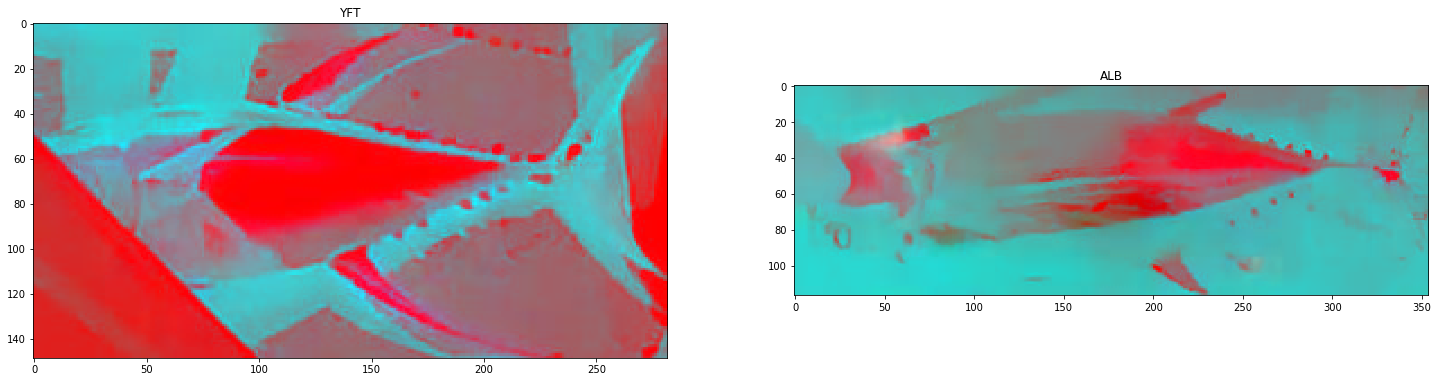

In [46]:
# Experiment with inversion between YFT and ALB
yft = np.array(imread('/a/data/fisheries_monitoring/cropped_data/YFT/img_01539-0.jpg'))
alb = np.array(imread('/a/data/fisheries_monitoring/cropped_data/ALB/img_01875-0.jpg'))
yft_aug = aug_dict['Invert'].augment_image(yft)
alb_aug = aug_dict['Invert'].augment_image(alb)

# Plot Original Fish
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1,2,1)
plt.imshow(yft)
ax.set_title('YFT')
ax = fig.add_subplot(1,2,2)
plt.imshow(alb)
ax.set_title('ALB')
plt.show()
# Plot Inverted Fish
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(1,2,1)
plt.imshow(yft_aug)
ax.set_title('YFT')
ax = fig.add_subplot(1,2,2)
plt.imshow(alb_aug)
ax.set_title('ALB')
plt.show()

In [ ]:
# Loop over original images
LOCALIZER_DATA_DIR = '/a/data/fisheries_monitoring/data/localizers/'
classes = ['NoF', 'YFT', 'ALB', 'BET', 'LAG', 'DOL', 'OTHER', 'SHARK']
for class_i in classes :
    if not os.path_exists(LOCALIZER_DATA_DIR + class_i) :
        # Make the dir
for img in range() :
    for k, v in aug_dict.iteritems() :
        aug_img = aug_dict[k].augment_image(img)
        # bb stuff
        # save

In [ ]:
# Augment the images
aug_pipeline.augment_images(images)